In [1]:
using ApproxFun
using SpecialFunctions

using LinearAlgebra
using SparseArrays

include("../src/Chebyshev.jl")
import .Chebyshev as CH

include("../src/SpectralRadialODE.jl")
import .SpectralRadialODE as RODE

import Plots
using Plots

import HDF5


In [2]:
using GenericLinearAlgebra # for svd of bigfloat matrix

# First try n=0

In [26]:
# input params
nr1 = 40;
nr2 = 80;
nr3 = 120;
nr4 = 160;

s = -2;
l = 2;
m = 2;
n = 3;
T= BigFloat;
a = T(0.999);
bhm = T(1);

rmin = T(0); ## location of future null infinity (1/r = ∞)
rmax = abs(a) > 0 ? (bhm / (a^2)) * (1 - sqrt(1 - ((a / bhm)^2))) : 0.5 / bhm;

In [27]:
M4 = RODE.radial_operator(nr4,s,l,m,n,a,bhm,rmin,rmax);

In [28]:
M1 = M4[1:nr1,1:nr1];
M2 = M4[1:nr2,1:nr2];
M3 = M4[1:nr3,1:nr3];

In [30]:
null1 = nullspace(Matrix(M1),rtol=1e-5);
null2 = nullspace(Matrix(M2),rtol=1e-5);
null3 = nullspace(Matrix(M3),rtol=1e-5);
null4 = nullspace(Matrix(M4),rtol=1e-5);

In [31]:
v1 = CH.to_real(null1[:,end]);
v2 = CH.to_real(null2[:,end]);
v3 = CH.to_real(null3[:,end]);
v4 = CH.to_real(null4[:,end]);

In [32]:
rs1 = CH.cheb_pts(rmin,rmax,nr1);
rs2 = CH.cheb_pts(rmin,rmax,nr2);
rs3 = CH.cheb_pts(rmin,rmax,nr3);
rs4 = CH.cheb_pts(rmin,rmax,nr4);

In [33]:
v1_amp = [abs(v) for v in v1];
v2_amp = [abs(v) for v in v2];
v3_amp = [abs(v) for v in v3];
v4_amp = [abs(v) for v in v4];

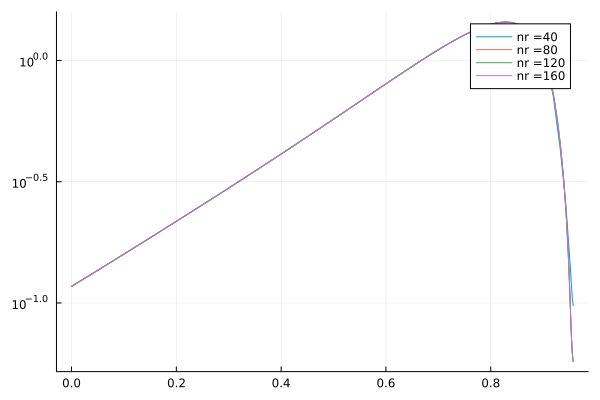

In [34]:
Plots.plot( rs1,[v for v in v1_amp],label="nr ="*string(nr1),yaxis=:log)
Plots.plot!( rs2,[v for v in v2_amp],label="nr ="*string(nr2))
Plots.plot!( rs3,[v for v in v3_amp],label="nr ="*string(nr3))
Plots.plot!( rs4,[v for v in v4_amp],label="nr ="*string(nr4))


# Interpolate to highest resolution

In [35]:
null1_interp = zeros(Complex{T},nr4);
null1_interp[1:nr1] = -null1[:,end];
null2_interp = zeros(Complex{T},nr4);
null2_interp[1:nr2] = null2[:,end];
null3_interp = zeros(Complex{T},nr4);
null3_interp[1:nr3] = -null3[:,end];

In [36]:
v1_interp = [abs(v) for v in CH.to_real(null1_interp)];
v2_interp = [abs(v) for v in CH.to_real(null2_interp)];
v3_interp = [abs(v) for v in CH.to_real(null3_interp)];

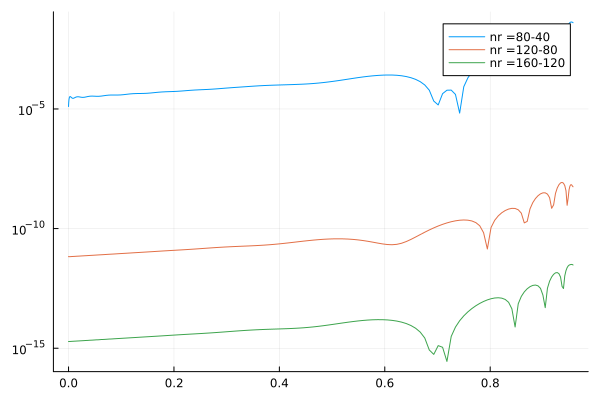

In [37]:
Plots.plot( rs4,[abs(v) for v in v2_interp-v1_interp],label="nr ="*string(nr2)*"-"*string(nr1),yaxis=:log)

Plots.plot!( rs4,[abs(v) for v in v3_interp-v2_interp],label="nr ="*string(nr3)*"-"*string(nr2))
Plots.plot!( rs4,[abs(v) for v in v4_amp-v3_interp],label="nr ="*string(nr4)*"-"*string(nr3))

It seems that big float is required to get convergence at large resolution!

In [ ]:
-